<h1>Exploratory Data Analysis<h1>

In this code, we try to induce Exploration Data Analysis for SeoulSpeed dataset https://github.com/yuyolshin/SeoulSpeedData, since pattern on each road segment is almost same, we decided to take an average speed for all street segment as dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
URBAN_CORE_CSV = 'urban-core.csv'
ADJ_URBAN_CORE_CSV = 'Adj(urban-core).csv'
URBAN_MIX_CSV = 'urban-mix.csv'
ADJ_URBAN_MIX_CSV = 'Adj(urban-mix).csv'

In [12]:
def eda(file_name):
    df = pd.read_csv(file_name, header=None) 

    max_speed = df.iloc[:, 7:].values.max()
    print("max speed: ", max_speed)

    transposed_df = df.transpose()

    column_averages = transposed_df[7:].mean(axis=1).reset_index(drop=True)

    _, (axes) = plt.subplots(3, 1, sharex=False)
    # Plot raw dataset
    for column in transposed_df.columns[:7]:  # Exclude the X column
        axes[0].plot(transposed_df.index[7:], transposed_df[column][7:], label=transposed_df[column][0])
        axes[0].set_xlabel('Time Step')
        axes[0].set_ylabel('Speed')
        axes[0].legend()

    axes[1].plot(column_averages.index, column_averages, label='Average Speed Among all Street Segment')
    axes[1].set_xlabel('Time Step')
    axes[1].set_ylabel('Speed')
    axes[1].legend()

    axes[2].boxplot(df.iloc[:3, 7:100])
    axes[2].legend()

    # Correlation Matrix
    # print(transposed_df[7:][:1])
    # correlation_matrix = transposed_df[7:][:1].corr(method='pearson')
    # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

    plt.savefig('eda-pic.png')
    plt.show()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


max speed:  97.72000002


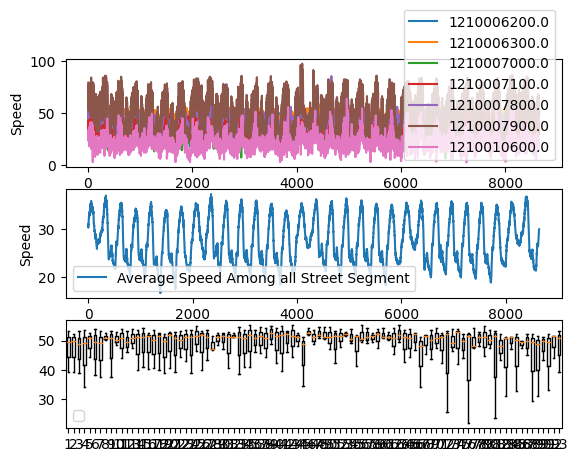

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


max speed:  127.0


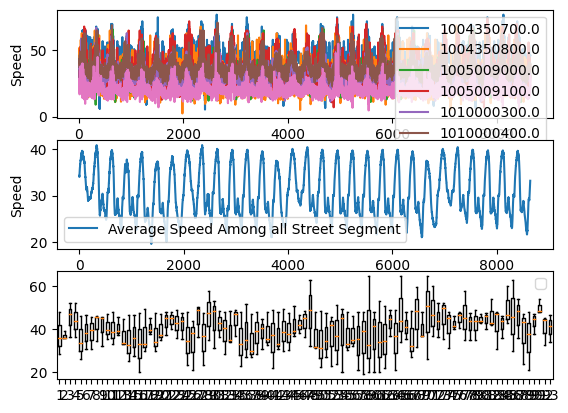

In [13]:
eda(URBAN_CORE_CSV)
eda(URBAN_MIX_CSV)